Projet 3 (DM) : https://www.schlouk-map.com/fr/cities/toulouse/happy-hour
Objectif :
Pour chaque bar vous allez à partir de la page d'acceil récupérer :
1 - le nom 
2 - les heures d'ouvertures 
3 - le lien href de l'adresse
4 - les services (uniquement oui) 
5 - tarifs des boissons en happy hour / standard 
6 - Exporter le tout dans un fichier csv
7 - (Bonus : 2 pts sur le CC) Créer une map leaflet avec les liens href récupérer sur le site

In [46]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen

In [47]:
url = requests.get('https://www.schlouk-map.com/fr/cities/toulouse/happy-hour').text
url2 = requests.get('https://www.schlouk-map.com/fr/cities/toulouse/happy-hour?page=2').text
site = url + url2
soup = BeautifulSoup(site, 'html.parser')



print(url)

    <!DOCTYPE html><html lang="fr" prefix="og: https://ogp.me/ns#"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no"><script>
    dataLayer = [];
    dataLayer.push({"user":{"role":"user"}});
</script><script>(function (w, d, s, l, i) {
    w[l] = w[l] || [];
    w[l].push({
        'gtm.start':
        new Date().getTime(), event: 'gtm.js'
    });
    var f = d.getElementsByTagName(s)[0],
    j = d.createElement(s), dl = l != 'dataLayer' ? '&l=' + l : '';
    j.async = true;
    j.src =
    'https://www.googletagmanager.com/gtm.js?id=' + i + dl;
    f.parentNode.insertBefore(j, f);
})(window, document, 'script', 'dataLayer', 'GTM-T38XT78');
</script><title>Tous les bars avec Happy Hour à Toulouse</title><meta name="description" content="Tous les Happy Hours de Toulouse sont sur Schlouk Map 🍺 c&#039;est l&#039;application gratuite des bars et des happy hours avec les horaires et les tarifs des boissons en happy hour."><met

In [48]:
titles = soup.find_all("a",class_= "name")
df_bar = pd.DataFrame(columns=['Nom','Prix','Adresse'])

for i,title in enumerate(titles) :
    df_bar.loc[i,'Nom']=title.text.strip()

df_bar


,Nom,Prix,Adresse
0,The Black Lion,NaN,NaN
1,Barricot,NaN,NaN
2,La Maison,NaN,NaN
3,El Circo,NaN,NaN
4,Ô Boudu Pont,NaN,NaN
...,...,...,...
60,The Melting Pot Pub,NaN,NaN
61,Les Tricheurs,NaN,NaN
62,Baraka Jeux,NaN,NaN
63,Dada,NaN,NaN


In [49]:
adresses = soup.find_all("p",class_="text-truncate mb-0 text-secondary")
for i, adresse in enumerate(adresses):
    df_bar.loc[i,'Adresse']=adresse.text.strip()

df_bar

,Nom,Prix,Adresse
0,The Black Lion,NaN,"4 Allées Paul Feuga, 31000 Toulouse"
1,Barricot,NaN,"8 Esp. Compans Caffarelli, 31000 Toulouse"
2,La Maison,NaN,"9 Rue Gabriel Pérri, 31000 Toulouse"
3,El Circo,NaN,"61 Rue Pargaminières, 31000 Toulouse"
4,Ô Boudu Pont,NaN,"1 Rue de la République, 31300 Toulouse"
...,...,...,...
60,The Melting Pot Pub,NaN,"26 Boulevard de Strasbourg, 31000 Toulouse"
61,Les Tricheurs,NaN,"34 Rue des Blanchers, 31000 Toulouse"
62,Baraka Jeux,NaN,"1 Boulevard de la Gare, 31500 Toulouse"
63,Dada,NaN,"27 Avenue Honoré Serres, 31000 Toulouse"


In [50]:
prices = soup.find_all("p",class_="text-truncate mb-2 text-secondary")
for i, price in enumerate(prices):
    df_bar.loc[i,'Prix']=price.text.strip()


In [51]:
df_bar['Prix'] = df_bar['Prix'].str.extract(r'(\d,\d{2})')
df_bar

,Nom,Prix,Adresse
0,The Black Lion,"4,00","4 Allées Paul Feuga, 31000 Toulouse"
1,Barricot,"8,00","8 Esp. Compans Caffarelli, 31000 Toulouse"
2,La Maison,"4,00","9 Rue Gabriel Pérri, 31000 Toulouse"
3,El Circo,NaN,"61 Rue Pargaminières, 31000 Toulouse"
4,Ô Boudu Pont,NaN,"1 Rue de la République, 31300 Toulouse"
...,...,...,...
60,The Melting Pot Pub,"4,70","26 Boulevard de Strasbourg, 31000 Toulouse"
61,Les Tricheurs,"4,00","34 Rue des Blanchers, 31000 Toulouse"
62,Baraka Jeux,"3,90","1 Boulevard de la Gare, 31500 Toulouse"
63,Dada,"4,00","27 Avenue Honoré Serres, 31000 Toulouse"


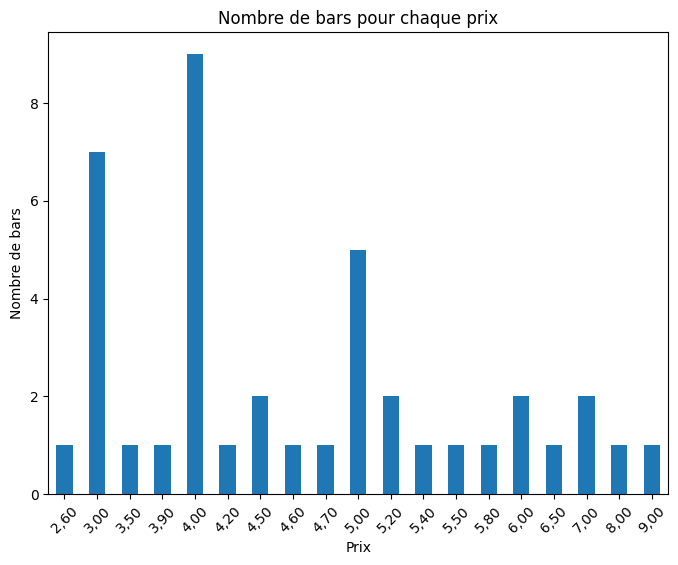

In [54]:
import matplotlib.pyplot as plt

prix_counts = df_bar['Prix'].value_counts()
prix_counts = prix_counts.sort_index()

plt.figure(figsize=(8, 6))
prix_counts.plot(kind='bar')
plt.title('Nombre de bars pour chaque prix')
plt.xlabel('Prix')
plt.ylabel('Nombre de bars')
plt.xticks(rotation=45)
plt.show()